# **Задание № 3**

решил использовать готовый пакет [SDV](https://docs.sdv.dev/sdv)

In [ ]:
pip install sdv

In [8]:
import pandas as pd
from sdv.metadata import SingleTableMetadata

from sdv.single_table import GaussianCopulaSynthesizer, CTGANSynthesizer
from sdv.evaluation.single_table import run_diagnostic
from sdv.evaluation.single_table import evaluate_quality
from sdv.evaluation.single_table import get_column_plot

In [3]:
german_credit_df = pd.read_csv('/content/german_credit_data_target - german_credit_data_target.csv')
loans_df = pd.read_csv('/content/loans_full_schema - loans_full_schema.csv')

In [4]:
german_credit_df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [5]:
loans_df.head()

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,...,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,NaN,NaN,NaN,...,C3,Mar-2018,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0
1,warehouse office clerk,10.0,HI,RENT,40000.0,Not Verified,5.04,NaN,NaN,NaN,...,C1,Feb-2018,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0
2,assembly,3.0,WI,RENT,40000.0,Source Verified,21.15,NaN,NaN,NaN,...,D1,Feb-2018,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0
3,customer service,1.0,PA,RENT,30000.0,Not Verified,10.16,NaN,NaN,NaN,...,A3,Jan-2018,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0
4,security supervisor,10.0,CA,RENT,35000.0,Verified,57.96,57000.0,Verified,37.66,...,C3,Mar-2018,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0


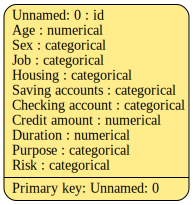

In [6]:
# Метаданные german_credit_df
german_credit_metadata = SingleTableMetadata()
german_credit_metadata.detect_from_dataframe(german_credit_df)
german_credit_metadata.visualize()

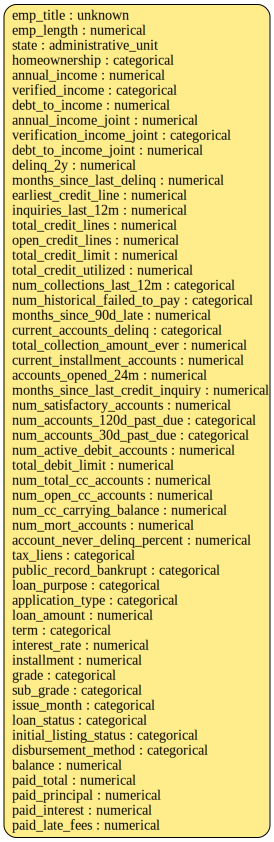

In [7]:
# Метаданные loans_df
loans_metadata = SingleTableMetadata()
loans_metadata.detect_from_dataframe(loans_df)
loans_metadata.visualize()

**CTGANSynthesizer**

In [11]:
ctgan_synthesizer = CTGANSynthesizer(german_credit_metadata)
ctgan_synthesizer.fit(german_credit_df)
ctgan_synthetic_data = ctgan_synthesizer.sample(num_rows=len(german_credit_df) * 100)
print(len(ctgan_synthetic_data))
ctgan_synthetic_data.head()

100000


,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,415302551,46,male,2,own,little,NaN,3149,5,car,bad
1,706041928,22,female,3,own,NaN,rich,16394,39,radio/TV,bad
2,975629174,37,female,1,free,quite rich,little,18424,7,radio/TV,good
3,526959801,47,female,3,own,NaN,little,2940,18,furniture/equipment,good
4,684278013,51,female,3,own,little,moderate,1118,22,radio/TV,bad


In [12]:
diagnostic = run_diagnostic(
    real_data=german_credit_df,
    synthetic_data=ctgan_synthetic_data,
    metadata=german_credit_metadata
)

Generating report ...

(1/2) Evaluating Data Validity: |██████████| 11/11 [00:00<00:00, 64.75it/s]|
Data Validity Score: 100.0%

(2/2) Evaluating Data Structure: |██████████| 1/1 [00:00<00:00, 139.02it/s]|
Data Structure Score: 100.0%

Overall Score (Average): 100.0%



In [13]:
quality_report = evaluate_quality(
    german_credit_df,
    ctgan_synthetic_data,
    german_credit_metadata
)

Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 11/11 [00:00<00:00, 20.10it/s]|
Column Shapes Score: 86.68%

(2/2) Evaluating Column Pair Trends: |██████████| 55/55 [00:05<00:00, 10.11it/s]|
Column Pair Trends Score: 78.8%

Overall Score (Average): 82.74%



In [14]:
ctgan_synthesizer = CTGANSynthesizer(loans_metadata)
ctgan_synthesizer.fit(loans_df)
ctgan_synthetic_data = ctgan_synthesizer.sample(num_rows=len(loans_df) * 100)
print(len(ctgan_synthetic_data))
ctgan_synthetic_data.head()

/usr/local/lib/python3.10/dist-packages/sdv/single_table/base.py:82: UserWarning: We strongly recommend saving the metadata using 'save_to_json' for replicability in future SDV versions.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


1000000


,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,...,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,sdv-pii-2qnox,8.0,Maryland,MORTGAGE,36970.508804,Verified,35.90,NaN,Not Verified,NaN,...,B4,Mar-2018,Current,whole,Cash,21163.20,3040.472966,1787.69,376.86,0.020070
1,sdv-pii-650un,0.0,West Virginia,MORTGAGE,73588.870623,Not Verified,29.06,NaN,NaN,NaN,...,C1,Feb-2018,Current,whole,Cash,12660.05,624.011456,704.78,546.90,0.046444
2,NaN,0.0,Massachusetts,RENT,43654.203891,Not Verified,5.10,NaN,NaN,NaN,...,B1,Mar-2018,Current,whole,Cash,4421.90,488.497637,995.58,125.69,0.026867
3,sdv-pii-dy7az,0.0,West Virginia,OWN,33186.482156,Source Verified,39.59,127732.08,NaN,NaN,...,B5,Feb-2018,Current,fractional,Cash,10404.37,214.807050,2444.27,0.00,0.000000
4,sdv-pii-gzbvv,6.0,Utah,OWN,20465.252593,Source Verified,5.42,NaN,NaN,NaN,...,C1,Feb-2018,Current,whole,Cash,21409.48,3333.006820,1965.51,1012.11,0.000000


In [15]:
diagnostic = run_diagnostic(
    real_data=loans_df,
    synthetic_data=ctgan_synthetic_data,
    metadata=loans_metadata
)

Generating report ...

(1/2) Evaluating Data Validity: |██████████| 55/55 [00:02<00:00, 27.00it/s]|
Data Validity Score: 100.0%

(2/2) Evaluating Data Structure: |██████████| 1/1 [00:00<00:00, 159.56it/s]|
Data Structure Score: 100.0%

Overall Score (Average): 100.0%



In [16]:
quality_report = evaluate_quality(
    loans_df,
    ctgan_synthetic_data,
    loans_metadata
)

Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 55/55 [00:08<00:00,  6.14it/s]|
Column Shapes Score: 85.93%

(2/2) Evaluating Column Pair Trends: |██████████| 1485/1485 [15:07<00:00,  1.64it/s]|
Column Pair Trends Score: 86.49%

Overall Score (Average): 86.21%

